In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [46]:
dtypes = {
        'Id'                : 'object',
        'boosts'            : 'uint8',
        'damageDealt'       : 'float16',
        'groupId'           : 'object',
        'matchId'           : 'object',   
        'killPlace'         : 'int8',  
        'kills'             : 'int8',    
        'killStreaks'       : 'int8',    
        'longestKill'       : 'float16',    
        'winPlacePerc'      : 'float16',
        'weaponsAcquired'   : 'float16',
        'walkDistance'      : 'float16',
        'headshot_rate'      : 'float16',
}
columns = ['Id', 'damageDealt', 'groupId', 'matchId','killPlace',
           'walkDistance','kills','killStreaks','longestKill',
           'winPlacePerc', 'weaponsAcquired', 'headshot_rate', 'boosts']

In [47]:
#train = pd.read_csv('./preprocessed_1.csv', dtype=dtypes, usecols=columns)
train = pd.read_csv('./preprocessed_1.csv', usecols=columns, dtype=dtypes)

### PUBG Feature engineering

#### Added features for machine learing:
1. Kills per walk distance
2. Boosts per walk distance
3. Headshots over kills
4. Damage dealt over kills

In [40]:
# Sampling training data for debugging (500.000 rows)
sample = 500000
df_sample = train.sample(sample)

In [41]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 214222 to 1671097
Data columns (total 12 columns):
Id                 500000 non-null object
groupId            500000 non-null object
matchId            500000 non-null object
damageDealt        500000 non-null float16
killPlace          500000 non-null int8
kills              500000 non-null int8
killStreaks        500000 non-null int8
longestKill        500000 non-null float16
walkDistance       500000 non-null float16
weaponsAcquired    500000 non-null float16
winPlacePerc       500000 non-null float16
headshot_rate      500000 non-null float16
dtypes: float16(6), int8(3), object(3)
memory usage: 22.4+ MB


#### 1. Kills per walking distance

In [58]:
train['killsWalkingDistance'] = train['kills'] / train['walkDistance']

#### 2. Boosts per walk distance

In [59]:
train['boostsWalkingDistance'] = train['boosts'] / train['walkDistance']

#### 3. Headshots over kills

Already included as headshot rate

#### 4. Damage dealt over kills

In [60]:
train['damageDealtKill'] = train['damageDealt'] / train['kills']

In [61]:
train.columns

Index(['Id', 'groupId', 'matchId', 'boosts', 'damageDealt', 'killPlace',
       'kills', 'killStreaks', 'longestKill', 'walkDistance',
       'weaponsAcquired', 'winPlacePerc', 'headshot_rate',
       'boostsWalkingDistance', 'damageDealtKill', 'killsWalkingDistance'],
      dtype='object')

#### Plot the correlation for the newly acquired features to the target value

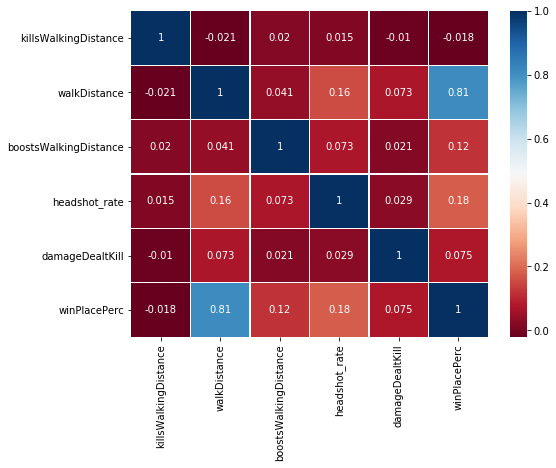

In [64]:
corr = train[['killsWalkingDistance', 'walkDistance', 'boostsWalkingDistance', 'headshot_rate', 'damageDealtKill', 'winPlacePerc']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()